## Links

### Possible algo

#### https://www.advancinganalytics.co.uk/blog/2021/06/22/10-incredibly-useful-time-series-forecasting-algorithms

### AR

#### https://vitalflux.com/autoregressive-ar-models-with-python-examples/
#### https://towardsdatascience.com/how-to-use-an-autoregressive-ar-model-for-time-series-analysis-bb12b7831024
#### https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/
#### https://www.cienciadedatos.net/documentos/py27-time-series-forecasting-python-scikitlearn-0.3.html
#### https://www.pluralsight.com/guides/machine-learning-for-time-series-data-in-python
#### https://towardsdatascience.com/time-series-forecasting-with-machine-learning-b3072a5b44ba


### Linear Regression

#### https://medium.com/analytics-vidhya/predict-population-growth-using-linear-regression-machine-learning-d555b1ff8f38

## Import dataframe

In [308]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [309]:
df = pd.read_csv(r"../dataset/cleaned_dataframe/Population_Growth_ONU.csv")

In [310]:
df.set_index("Country", inplace=True)
df.drop(columns=["ISO3166-1-numeric", "ISO3166-1-Alpha-3", "ISO3166-1-Alpha-2", "Sub-region Name", "Region", "Country code"], inplace=True)
df

1950        1951        1952        1953  \
Country                                                                     
Burundi                      2308.927    2360.442    2406.034    2449.089   
Comoros                       159.459     163.146     166.538     169.748   
Djibouti                       62.000      63.313      64.744      66.273   
Eritrea                       822.347     835.000     849.258     864.893   
Ethiopia                    18128.030   18466.973   18819.701   19184.288   
...                               ...         ...         ...         ...   
Bermuda                        37.256      37.800      38.437      39.142   
Canada                      13733.398   14078.449   14445.453   14834.905   
Greenland                      22.993      23.466      23.936      24.465   
Saint Pierre and Miquelon       4.567       4.609       4.648       4.678   
United States of America   158804.397  160872.264  163266.026  165909.996   

                                 1954        1955        1956        1957  \
Country                                                                     
Burundi                      2492.192    2537.150    2584.913    2635.622   
Comoros                       172.853     175.906     178.946     181.990   
Djibouti                       67.884      69.593      71.494      73.699   
Eritrea                       881.761     899.746     918.849     939.085   
Ethiopia                    19560.012   19947.291   20347.810   20764.450   
...                               ...         ...         ...         ...   
Bermuda                        39.914      40.709      41.535      42.370   
Canada                      15245.416   15673.764   16114.734   16561.263   
Greenland                      25.092      25.846      26.727      27.733   
Saint Pierre and Miquelon       4.721       4.749       4.801       4.841   
United States of America   168736.390  171685.337  174705.006  177751.477   

                                 1958        1959  ...        2011  \
Country                                            ...               
Burundi                      2688.751    2743.202  ...    8958.406   
Comoros                       185.046     188.088  ...     706.578   
Djibouti                       76.352      79.615  ...     853.671   
Eritrea                       960.538     983.337  ...    3213.969   
Ethiopia                    21201.028   21661.994  ...   90139.928   
...                               ...         ...  ...         ...   
Bermuda                        43.227      44.091  ...      65.076   
Canada                      17004.835   17436.204  ...   34539.156   
Greenland                      28.842      30.019  ...      56.555   
Saint Pierre and Miquelon       4.886       4.929  ...       6.323   
United States of America   180788.387  183786.249  ...  311584.051   

                                 2012        2013        2014        2015  \
Country                                                                     
Burundi                      9245.992    9540.302    9844.301   10160.034   
Comoros                       723.865     741.511     759.390     777.435   
Djibouti                      868.136     883.296     898.707     913.998   
Eritrea                      3250.104    3281.453    3311.444    3342.818   
Ethiopia                    92726.982   95385.793   98094.264  100835.453   
...                               ...         ...         ...         ...   
Bermuda                        64.737      64.381      64.038      63.695   
Canada                      34922.031   35296.535   35664.338   36026.668   
Greenland                      56.477      56.412      56.383      56.378   
Saint Pierre and Miquelon       6.251       6.168       6.073       5.992   
United States of America   314043.885  316400.539  318673.422  320878.312   

                                 2016        2017        2018        2019  \
Country                                

In [311]:
# Define base dataframe

# temporary dataframe
df_temp = df.copy()

# Country dataframe
df_France = df_temp.loc[df_temp.index == "France"]
df_Canada = df_temp.loc[df_temp.index == "Canada"]

### Total population
df_total = df_temp.sum(axis=0)
# Set to scale
df_total = df_total*1000
# To dataframe
df_total = df_total.to_frame()
df_total = df_total.rename(columns={0: "Population"})
df_total.index.name="year"

df_France

1950       1951       1952       1953       1954       1955  \
Country                                                                     
France   41833.873  42031.196  42315.598  42654.661  43024.817  43411.377   

              1956       1957       1958       1959  ...       2011  \
Country                                              ...              
France   43808.997  44221.224  44659.052  45138.433  ...  63222.229   

              2012       2013      2014       2015      2016       2017  \
Country                                                                   
France   63564.224  63893.521  64193.55  64453.194  64667.59  64842.513   

              2018       2019       2020  
Country                                   
France   64990.512  65129.731  65273.512  

[1 rows x 71 columns]

   ## Auto regressive model
   
   https://vitalflux.com/autoregressive-ar-models-with-python-examples/

### France

In [312]:
from statsmodels.tsa.ar_model import AutoReg

In [313]:
# Set value to scale
df_France = df_France * 1000

df_France

1950        1951        1952        1953        1954  \
Country                                                               
France   41833873.0  42031196.0  42315598.0  42654661.0  43024817.0   

               1955        1956        1957        1958        1959  ...  \
Country                                                              ...   
France   43411377.0  43808997.0  44221224.0  44659052.0  45138433.0  ...   

               2011        2012        2013        2014        2015  \
Country                                                               
France   63222229.0  63564224.0  63893521.0  64193550.0  64453194.0   

               2016        2017        2018        2019        2020  
Country                                                              
France   64667590.0  64842513.0  64990512.0  65129731.0  65273512.0  

[1 rows x 71 columns]

In [314]:
# Transpose Dataframe

df_France_t = df_France.transpose()
df_Canada_t = df_Canada.transpose()

df_France_t

Country      France
1950     41833873.0
1951     42031196.0
1952     42315598.0
1953     42654661.0
1954     43024817.0
...             ...
2016     64667590.0
2017     64842513.0
2018     64990512.0
2019     65129731.0
2020     65273512.0

[71 rows x 1 columns]

<AxesSubplot:>

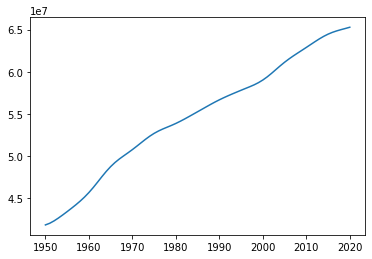

In [315]:
# Plot Dataframe

# France
df_France_t['France'].plot()

In [316]:
# Determine stationarity

from statsmodels.tsa.stattools import adfuller

df_stationarityTest = adfuller(df_France_t['France'], autolag='AIC')

# P value

print("P-value: ", df_stationarityTest[1]) # p > 0.05 so stationarity doesn't exist

P-value:  0.432701340690417


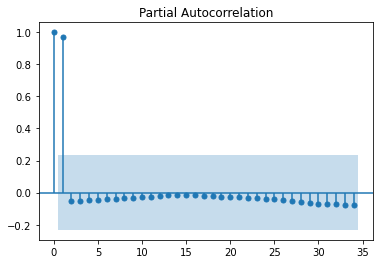

In [317]:
# Order of AR model to be trained
# Partial autocorrelation function

from statsmodels.graphics.tsaplots import plot_pacf

pacf = plot_pacf(df_France_t['France'], lags=34)

In [318]:
# Train the model

# Train dataframe first half
train_data = df_France_t['France'][:len(df_France_t)-35]

# Test dataframe last half
test_data = df_France_t['France'][len(df_France_t)-35:]

# Fit model
ar_model = AutoReg(train_data, lags=1).fit()

# Print Summary

print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                 France   No. Observations:                   36
Model:                     AutoReg(1)   Log Likelihood                -456.990
Method:               Conditional MLE   S.D. of innovations         113313.056
Date:                Mon, 23 May 2022   AIC                             23.447
Time:                        15:17:58   BIC                             23.581
Sample:                    01-01-1951   HQIC                            23.493
                         - 01-01-1985                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.718e+05   2.21e+05      4.398      0.000    5.39e+05     1.4e+06
France.L1      0.9880      0.005    219.475      0.000       0.979       0.997
                                    Roots           

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


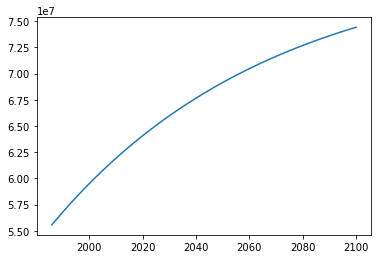

In [319]:
# Prediction

pred = ar_model.predict(start=len(train_data), end=(150), dynamic=False)

# Plot pred vs test data
from matplotlib import pyplot
pyplot.plot(pred)

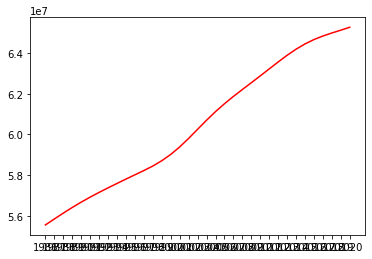

In [320]:
# Real data

pyplot.plot(test_data, color="red")

### World Population

<AxesSubplot:xlabel='year'>

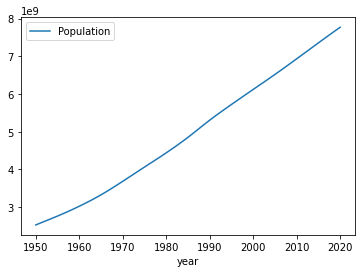

In [321]:
# Plot Dataframe

# Mondial pop
df_total.plot()

In [322]:
# Determine stationarity

from statsmodels.tsa.stattools import adfuller

df_stationarityTest = adfuller(df_total, autolag='AIC')

# P value

print("P-value: ", df_stationarityTest[1]) # p > 0.05 so stationarity doesn't exist

P-value:  0.5896104294160914


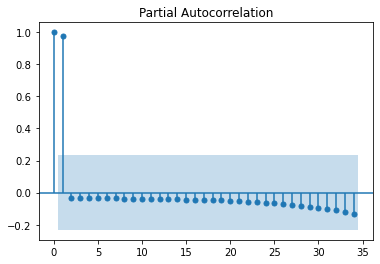

In [323]:
# Order of AR model to be trained
# Partial autocorrelation function

from statsmodels.graphics.tsaplots import plot_pacf

pacf = plot_pacf(df_total['Population'], lags=34)

#### Half data

In [324]:
# Train the model

# Train dataframe first half
train_data = df_total['Population'][:len(df_total)-35]

# Test dataframe last half
test_data = df_total['Population'][len(df_total)-35:]

# Fit model
ar_model = AutoReg(train_data, lags=1).fit()

# Print Summary

print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:             Population   No. Observations:                   36
Model:                     AutoReg(1)   Log Likelihood                -580.257
Method:               Conditional MLE   S.D. of innovations        3835562.292
Date:                Mon, 23 May 2022   AIC                             30.491
Time:                        15:17:59   BIC                             30.624
Sample:                    01-01-1951   HQIC                            30.537
                         - 01-01-1985                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      4.148e+06   3.46e+06      1.200      0.230   -2.63e+06    1.09e+07
Population.L1     1.0176      0.001   1059.253      0.000       1.016       1.019
                                    Root

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


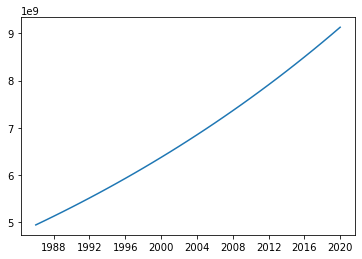

In [325]:
# Prediction

pred = ar_model.predict(start=len(train_data), end=70, dynamic=False)

# Plot pred vs test data
from matplotlib import pyplot
pyplot.plot(pred)

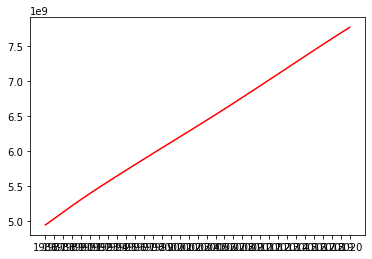

In [326]:
# Real data

pyplot.plot(test_data, color="red")

#### All data

In [327]:
# Train the model

# Train dataframe first half
train_data = df_total['Population']

# Test dataframe last half
test_data = df_total['Population'][len(df_total)-35:]

# Fit model
ar_model = AutoReg(train_data, lags=1).fit()

# Print Summary

print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:             Population   No. Observations:                   71
Model:                     AutoReg(1)   Log Likelihood               -1212.101
Method:               Conditional MLE   S.D. of innovations        8014671.099
Date:                Mon, 23 May 2022   AIC                             31.879
Time:                        15:17:59   BIC                             31.976
Sample:                    01-01-1951   HQIC                            31.918
                         - 01-01-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      4.467e+07   3.15e+06     14.196      0.000    3.85e+07    5.08e+07
Population.L1     1.0062      0.001   1647.343      0.000       1.005       1.007
                                    Root

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


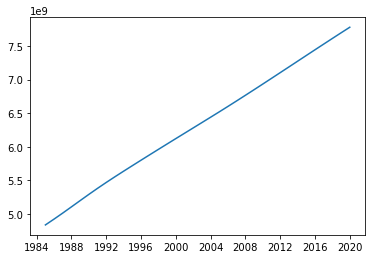

In [328]:
# Prediction

pred = ar_model.predict(start=35, end=70, dynamic=False)

# Plot pred vs test data
from matplotlib import pyplot
pyplot.plot(pred)

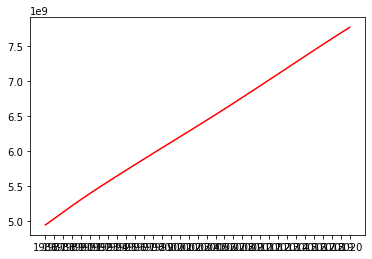

In [329]:
# Real data

pyplot.plot(test_data, color="red")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


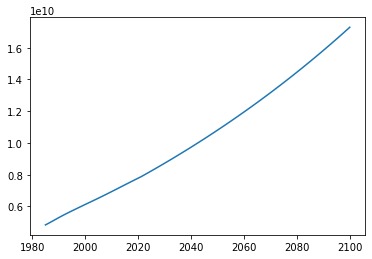

In [330]:
pred = ar_model.predict(start=35, end=150, dynamic=False)

# Plot pred vs test data
from matplotlib import pyplot
pyplot.plot(pred)

## Linear regression model

https://towardsdatascience.com/using-machine-learning-to-predict-country-population-550f9e5f3e24

In [331]:
# Set year as column

df_total = df_total.reset_index()

In [332]:
df_total

year    Population
0   1950  2.528212e+09
1   1951  2.575477e+09
2   1952  2.621973e+09
3   1953  2.668394e+09
4   1954  2.715308e+09
..   ...           ...
66  2016  7.437879e+09
67  2017  7.521613e+09
68  2018  7.604746e+09
69  2019  7.687028e+09
70  2020  7.768267e+09

[71 rows x 2 columns]

In [333]:
# Transform as 2D array

x = df_total.iloc[:, 0].values.reshape(-1, 1)
y = df_total.iloc[:, 1].values.reshape(-1, 1)

In [334]:
# Fit x and y
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x, y)

In [335]:
# Predict

y_pred = model.predict([[2021]])
y_pred

array([[7.74175295e+09]])

In [336]:
# Dictionnary of prediction

predict_dict = {}
start = 2021

for i in range(30):
    year = start + i
    predict_dict[f"{year}"] = model.predict([[year]])[0][0]

In [337]:
# Create prediction Dataframe

linear_regression_prediction_df = pd.DataFrame.from_dict(predict_dict, orient='index')
linear_regression_prediction_df.rename(columns={0:"Population"}, inplace=True)
linear_regression_prediction_df.index.name = "Year"

In [338]:
# Save as csv

linear_regression_prediction_df.to_csv(r"../dataset/cleaned_dataframe/Population_Growth_Prediction.csv")

## AR Prediction dataset

In [339]:
# Define base Dataframe
df_base_ar = df.copy()

# Set value to scale
df_base_ar = df_base_ar*1000

In [340]:
# Prediction Dataframe
testl = ['France', 'Canada']
all_df_country = []

for i in df_base_ar.index:
    # df by country
    df_country = df_base_ar.loc[df_base_ar.index == str(i)]
    # Transpose dataframe
    df_country_t = df_country.transpose()
    
    ### Train the model
    # Train dataframe all data by country
    train_data = df_country_t[str(i)]

    # Fit model
    ar_model = AutoReg(train_data, lags=1).fit()
    
    # Prediction
    pred = ar_model.predict(start=len(train_data), end=100, dynamic=False)
    
    # Create df of country and append it to a list
    df_country = pd.DataFrame(pred).transpose()
    df_country.rename(index={0: str(i)}, inplace=True)
    all_df_country.append(df_country)

final_ar_df = pd.concat(all_df_country)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequ

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No f

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No f

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No f

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No f

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No f

In [360]:
df_temp = pd.read_csv(r"../dataset/cleaned_dataframe/Population_Growth_ONU.csv")
df_merge = pd.merge(left=final_ar_df, right=df_temp["ISO3166-1-Alpha-3"], how='left', left_on=final_ar_df.index, right_on=df_temp["Country"])
df_merge = df_merge.rename(columns={"key_0": "Country"})
df_merge.to_csv(r"../dataset/cleaned_dataframe/Population_Growth_Prediction.csv")

In [366]:
df_prediction = pd.read_csv(r"../dataset/cleaned_dataframe/Population_Growth_Prediction.csv")
df_prediction["2021-01-01 00:00:00"]

0      1.226724e+07
1      8.910208e+05
2      1.005887e+06
3      3.601963e+06
4      1.182574e+08
           ...     
227    6.243787e+04
228    3.806643e+07
229    5.695602e+04
230    5.812811e+03
231    3.334793e+08
Name: 2021-01-01 00:00:00, Length: 232, dtype: float64

## LR Prediction dataset

In [342]:
# Define base dataframe
df_base_lr = df.copy()

# Set value to scale
df_base_lr = df_base_lr * 1000

In [343]:
df_base_lr

1950         1951         1952         1953  \
Country                                                                         
Burundi                      2308927.0    2360442.0    2406034.0    2449089.0   
Comoros                       159459.0     163146.0     166538.0     169748.0   
Djibouti                       62000.0      63313.0      64744.0      66273.0   
Eritrea                       822347.0     835000.0     849258.0     864893.0   
Ethiopia                    18128030.0   18466973.0   18819701.0   19184288.0   
...                                ...          ...          ...          ...   
Bermuda                        37256.0      37800.0      38437.0      39142.0   
Canada                      13733398.0   14078449.0   14445453.0   14834905.0   
Greenland                      22993.0      23466.0      23936.0      24465.0   
Saint Pierre and Miquelon       4567.0       4609.0       4648.0       4678.0   
United States of America   158804397.0  160872264.0  163266026.0  165909996.0   

                                  1954         1955         1956         1957  \
Country                                                                         
Burundi                      2492192.0    2537150.0    2584913.0    2635622.0   
Comoros                       172853.0     175906.0     178946.0     181990.0   
Djibouti                       67884.0      69593.0      71494.0      73699.0   
Eritrea                       881761.0     899746.0     918849.0     939085.0   
Ethiopia                    19560012.0   19947291.0   20347810.0   20764450.0   
...                                ...          ...          ...          ...   
Bermuda                        39914.0      40709.0      41535.0      42370.0   
Canada                      15245416.0   15673764.0   16114734.0   16561263.0   
Greenland                      25092.0      25846.0      26727.0      27733.0   
Saint Pierre and Miquelon       4721.0       4749.0       4801.0       4841.0   
United States of America   168736390.0  171685337.0  174705006.0  177751477.0   

                                  1958         1959  ...         2011  \
Country                                              ...                
Burundi                      2688751.0    2743202.0  ...    8958406.0   
Comoros                       185046.0     188088.0  ...     706578.0   
Djibouti                       76352.0      79615.0  ...     853671.0   
Eritrea                       960538.0     983337.0  ...    3213969.0   
Ethiopia                    21201028.0   21661994.0  ...   90139928.0   
...                                ...          ...  ...          ...   
Bermuda                        43227.0      44091.0  ...      65076.0   
Canada                      17004835.0   17436204.0  ...   34539156.0   
Greenland                      28842.0      30019.0  ...      56555.0   
Saint Pierre and Miquelon       4886.0       4929.0  ...       6323.0   
United States of America   180788387.0  183786249.0  ...  311584051.0   

                                  2012         2013         2014         2015  \
Country                                                                         
Burundi                      9245992.0    9540302.0    9844301.0   10160034.0   
Comoros                       723865.0     741511.0     759390.0     777435.0   
Djibouti                      868136.0     883296.0     898707.0     913998.0   
Eritrea                      3250104.0    3281453.0    3311444.0    3342818.0   
Ethiopia                    92726982.0   95385793.0   98094264.0  100835453.0   
...                                ...          ...          ...          ...   
Bermuda                        64737.0      64381.0      64038.0      63695.0   
Canada                      34922031.0   35296535.0   35664338.0   36026668.0   
Greenland                      56477.0      56412.0      56383.0      56378.0   
Saint Pierre and Miquelon       6251.0       6168.0       6073.0       5992.0   
Unit

In [344]:
# df country for linear
df_country = df_base_lr.loc[df_base_lr.index == 'France']
serie_country = df_country.squeeze()
df_country = serie_country.to_frame()
df_country = df_country.rename(columns={"France": "Population"})
df_country.index.name="year"
df_country = df_country.reset_index()

In [345]:
# Transform as 2D array

x = df_country.iloc[:, 0].values.reshape(-1, 1)
y = df_country.iloc[:, 1].values.reshape(-1, 1)

In [346]:
# Fit x and y
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x, y)

In [347]:
# Predict

y_pred = model.predict([[2050]])
y_pred

array([[76229509.30063713]])

In [348]:
base_year = 2021
country_dict = {}
all_df_country = []

for i in df_base_lr.index:
    # df country for linear
    df_country = df_base_lr.loc[df_base_lr.index == str(i)]
    serie_country = df_country.squeeze()
    df_country = serie_country.to_frame()
    df_country = df_country.rename(columns={str(i): "Population"})
    df_country.index.name="year"
    df_country = df_country.reset_index()
    
    # Transform as 2D array
    x = df_country.iloc[:, 0].values.reshape(-1, 1)
    y = df_country.iloc[:, 1].values.reshape(-1, 1)

    # Fit x and y
    model = LinearRegression().fit(x, y)
    
    # Create dict of predict by country
    for j in range(30):
        country_dict[base_year + j] = model.predict([[base_year + j]])[0][0]
    
    # Create series from dict
    country_ser = pd.Series(data=country_dict)
    print(i)
    print(country_dict)
    # Create df of country and append it to a list
    df_country = pd.DataFrame(pred).transpose()
    df_country.rename(index={0: str(i)}, inplace=True)
    all_df_country.append(df_country)
        
final_lr_df = pd.concat(all_df_country)

Burundi
{2021: 9795343.591146886, 2022: 9916968.468678743, 2023: 10038593.346210599, 2024: 10160218.223742455, 2025: 10281843.101274312, 2026: 10403467.978806168, 2027: 10525092.856338024, 2028: 10646717.73386988, 2029: 10768342.611401737, 2030: 10889967.488933593, 2031: 11011592.36646545, 2032: 11133217.243997306, 2033: 11254842.121529162, 2034: 11376466.999061018, 2035: 11498091.876592875, 2036: 11619716.75412473, 2037: 11741341.631656587, 2038: 11862966.509188443, 2039: 11984591.38672033, 2040: 12106216.264252186, 2041: 12227841.141784042, 2042: 12349466.019315898, 2043: 12471090.896847755, 2044: 12592715.774379611, 2045: 12714340.651911467, 2046: 12835965.529443324, 2047: 12957590.40697518, 2048: 13079215.284507036, 2049: 13200840.162038893, 2050: 13322465.039570749}
Comoros
{2021: 775517.2454728372, 2022: 785626.4616029486, 2023: 795735.6777330637, 2024: 805844.8938631788, 2025: 815954.1099932939, 2026: 826063.3261234052, 2027: 836172.5422535203, 2028: 846281.7583836354, 2029: 856

Democratic Republic of the Congo
{2021: 73428530.77022147, 2022: 74442773.33504367, 2023: 75457015.8998661, 2024: 76471258.4646883, 2025: 77485501.0295105, 2026: 78499743.59433293, 2027: 79513986.15915513, 2028: 80528228.72397733, 2029: 81542471.28879952, 2030: 82556713.85362196, 2031: 83570956.41844416, 2032: 84585198.98326635, 2033: 85599441.54808879, 2034: 86613684.11291099, 2035: 87627926.67773318, 2036: 88642169.24255538, 2037: 89656411.80737782, 2038: 90670654.37220001, 2039: 91684896.93702221, 2040: 92699139.50184464, 2041: 93713382.06666684, 2042: 94727624.63148904, 2043: 95741867.19631147, 2044: 96756109.76113367, 2045: 97770352.32595587, 2046: 98784594.89077806, 2047: 99798837.4556005, 2048: 100813080.0204227, 2049: 101827322.5852449, 2050: 102841565.15006733}
Equatorial Guinea
{2021: 1030646.2398390323, 2022: 1045038.1627766602, 2023: 1059430.0857142843, 2024: 1073822.0086519122, 2025: 1088213.9315895364, 2026: 1102605.8545271643, 2027: 1116997.7774647884, 2028: 1131389.7004

Azerbaijan
{2021: 10297185.094164997, 2022: 10400021.737625778, 2023: 10502858.381086528, 2024: 10605695.024547309, 2025: 10708531.66800806, 2026: 10811368.31146884, 2027: 10914204.95492959, 2028: 11017041.59839037, 2029: 11119878.241851121, 2030: 11222714.885311902, 2031: 11325551.528772652, 2032: 11428388.172233403, 2033: 11531224.815694183, 2034: 11634061.459154934, 2035: 11736898.102615714, 2036: 11839734.746076465, 2037: 11942571.389537245, 2038: 12045408.032997996, 2039: 12148244.676458776, 2040: 12251081.319919527, 2041: 12353917.963380307, 2042: 12456754.606841058, 2043: 12559591.250301838, 2044: 12662427.893762589, 2045: 12765264.537223369, 2046: 12868101.18068412, 2047: 12970937.8241449, 2048: 13073774.46760565, 2049: 13176611.111066401, 2050: 13279447.754527181}
Bahrain
{2021: 1293252.8611670062, 2022: 1313454.2728034928, 2023: 1333655.6844399795, 2024: 1353857.0960764587, 2025: 1374058.5077129453, 2026: 1394259.919349432, 2027: 1414461.3309859186, 2028: 1434662.7426224053, 

Maldives
{2021: 437888.3674044255, 2022: 443918.77706237324, 2023: 449949.18672032095, 2024: 455979.5963782687, 2025: 462010.0060362164, 2026: 468040.4156941641, 2027: 474070.82535211183, 2028: 480101.23501005955, 2029: 486131.64466800727, 2030: 492162.054325955, 2031: 498192.4639839027, 2032: 504222.8736418504, 2033: 510253.28329979815, 2034: 516283.69295774586, 2035: 522314.1026156936, 2036: 528344.5122736413, 2037: 534374.921931589, 2038: 540405.3315895367, 2039: 546435.7412474845, 2040: 552466.1509054322, 2041: 558496.5605633799, 2042: 564526.9702213276, 2043: 570557.3798792753, 2044: 576587.789537223, 2045: 582618.1991951708, 2046: 588648.6088531185, 2047: 594679.0185110662, 2048: 600709.4281690139, 2049: 606739.8378269617, 2050: 612770.2474849094}
Nepal
{2021: 29646602.76981902, 2022: 29972480.127666116, 2023: 30298357.48551309, 2024: 30624234.843360186, 2025: 30950112.20120728, 2026: 31275989.559054375, 2027: 31601866.91690147, 2028: 31927744.274748564, 2029: 32253621.63259566, 

Bahamas
{2021: 401547.0957746487, 2022: 406221.75375586934, 2023: 410896.41173709, 2024: 415571.0697183106, 2025: 420245.72769953124, 2026: 424920.3856807519, 2027: 429595.0436619725, 2028: 434269.70164319314, 2029: 438944.3596244138, 2030: 443619.0176056344, 2031: 448293.67558685504, 2032: 452968.3335680757, 2033: 457642.9915492963, 2034: 462317.64953051694, 2035: 466992.30751173757, 2036: 471666.9654929582, 2037: 476341.62347417884, 2038: 481016.28145539947, 2039: 485690.9394366201, 2040: 490365.59741784073, 2041: 495040.25539906137, 2042: 499714.913380282, 2043: 504389.57136150263, 2044: 509064.22934272327, 2045: 513738.8873239439, 2046: 518413.54530516453, 2047: 523088.20328638516, 2048: 527762.8612676058, 2049: 532437.5192488264, 2050: 537112.1772300471}
Barbados
{2021: 292295.24949698197, 2022: 293312.93326626415, 2023: 294330.6170355466, 2024: 295348.300804829, 2025: 296365.9845741114, 2026: 297383.6683433936, 2027: 298401.352112676, 2028: 299419.03588195844, 2029: 300436.719651

United States Virgin Islands
{2021: 130140.24989939667, 2022: 131434.56317907432, 2023: 132728.87645875243, 2024: 134023.18973843055, 2025: 135317.50301810866, 2026: 136611.81629778678, 2027: 137906.1295774649, 2028: 139200.442857143, 2029: 140494.75613682112, 2030: 141789.06941649923, 2031: 143083.38269617734, 2032: 144377.69597585546, 2033: 145672.0092555331, 2034: 146966.32253521122, 2035: 148260.63581488933, 2036: 149554.94909456745, 2037: 150849.26237424556, 2038: 152143.57565392368, 2039: 153437.8889336018, 2040: 154732.2022132799, 2041: 156026.51549295802, 2042: 157320.82877263613, 2043: 158615.14205231378, 2044: 159909.4553319919, 2045: 161203.76861167, 2046: 162498.08189134812, 2047: 163792.39517102623, 2048: 165086.70845070435, 2049: 166381.02173038246, 2050: 167675.33501006057}
Belize
{2021: 356482.05030180886, 2022: 361044.82830315083, 2023: 365607.6063044928, 2024: 370170.38430583477, 2025: 374733.1623071749, 2026: 379295.94030851685, 2027: 383858.7183098588, 2028: 388421.

Solomon Islands
{2021: 607578.1179074459, 2022: 615933.598490946, 2023: 624289.0790744461, 2024: 632644.5596579462, 2025: 641000.0402414463, 2026: 649355.5208249502, 2027: 657711.0014084503, 2028: 666066.4819919504, 2029: 674421.9625754505, 2030: 682777.4431589544, 2031: 691132.9237424545, 2032: 699488.4043259546, 2033: 707843.8849094547, 2034: 716199.3654929586, 2035: 724554.8460764587, 2036: 732910.3266599588, 2037: 741265.8072434589, 2038: 749621.2878269628, 2039: 757976.7684104629, 2040: 766332.248993963, 2041: 774687.7295774631, 2042: 783043.210160967, 2043: 791398.6907444671, 2044: 799754.1713279672, 2045: 808109.6519114673, 2046: 816465.1324949712, 2047: 824820.6130784713, 2048: 833176.0936619714, 2049: 841531.5742454715, 2050: 849887.0548289716}
Vanuatu
{2021: 271507.53762575425, 2022: 275038.3170355465, 2023: 278569.0964453388, 2024: 282099.8758551311, 2025: 285630.65526492335, 2026: 289161.4346747147, 2027: 292692.21408450697, 2028: 296222.99349429924, 2029: 299753.7729040915

Romania
{2021: 22367206.52676058, 2022: 22410994.55352114, 2023: 22454782.580281705, 2024: 22498570.607042268, 2025: 22542358.63380283, 2026: 22586146.660563394, 2027: 22629934.687323958, 2028: 22673722.71408452, 2029: 22717510.740845084, 2030: 22761298.767605647, 2031: 22805086.79436621, 2032: 22848874.821126774, 2033: 22892662.847887337, 2034: 22936450.8746479, 2035: 22980238.901408464, 2036: 23024026.928169027, 2037: 23067814.95492959, 2038: 23111602.981690153, 2039: 23155391.008450717, 2040: 23199179.03521128, 2041: 23242967.061971843, 2042: 23286755.088732406, 2043: 23330543.11549297, 2044: 23374331.142253533, 2045: 23418119.169014096, 2046: 23461907.19577466, 2047: 23505695.222535223, 2048: 23549483.249295786, 2049: 23593271.27605635, 2050: 23637059.302816913}
Russian Federation
{2021: 155283187.46438646, 2022: 155827435.8149228, 2023: 156371684.1654594, 2024: 156915932.51599598, 2025: 157460180.86653256, 2026: 158004429.21706915, 2027: 158548677.56760573, 2028: 159092925.9181423

Slovenia
{2021: 2177821.72394366, 2022: 2187132.197887322, 2023: 2196442.671830984, 2024: 2205753.1457746495, 2025: 2215063.6197183114, 2026: 2224374.0936619733, 2027: 2233684.567605635, 2028: 2242995.041549297, 2029: 2252305.515492959, 2030: 2261615.989436621, 2031: 2270926.4633802827, 2032: 2280236.9373239446, 2033: 2289547.4112676065, 2034: 2298857.8852112684, 2035: 2308168.3591549303, 2036: 2317478.8330985922, 2037: 2326789.307042254, 2038: 2336099.780985916, 2039: 2345410.254929578, 2040: 2354720.72887324, 2041: 2364031.2028169017, 2042: 2373341.6767605636, 2043: 2382652.1507042255, 2044: 2391962.6246478874, 2045: 2401273.0985915493, 2046: 2410583.572535211, 2047: 2419894.046478873, 2048: 2429204.520422535, 2049: 2438514.994366197, 2050: 2447825.468309859}
Spain
{2021: 48381109.00120729, 2022: 48668341.60335344, 2023: 48955574.20549971, 2024: 49242806.80764598, 2025: 49530039.409792125, 2026: 49817272.01193839, 2027: 50104504.61408454, 2028: 50391737.21623081, 2029: 50678969.81837